In [1]:
from sympy import *

$ \frac{\partial^2 v_a}{\partial t^2}$

$ \frac{\partial^2 v_a}{\partial \chi_c \partial \chi_b} \frac{\partial \chi_b}{\partial t} \frac{\partial \chi_c}{\partial t}$

<IPython.core.display.Javascript object>


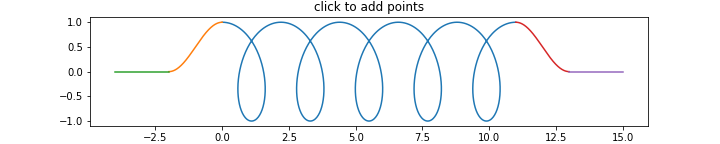

In [78]:
from matplotlib import pyplot as plt
import numpy as np

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

%matplotlib notebook
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
ax.set_title('click to add points')
p=np.linspace(0,2*np.pi*5,1000)
x=(.35*p+np.sin(p))
y=np.cos(p)
ax.plot(x,y)
x=p/5/np.pi-2
y=-.5*np.cos(p/10)+.5
ax.plot(x,y)
ax.plot([-4,-2],[0,0])
x=p/5/np.pi+2*np.pi*5*.35
y=.5*np.cos(p/10)+.5
ax.plot(x,y)
ax.plot([x[-1],x[-1]+2],[0,0])
line, = ax.plot([], [], linestyle="-", marker="o", color="r")
linebuilder = LineBuilder(line)

In [15]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [17]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()
